<a href="https://colab.research.google.com/github/mkgreen/NLP-Amazon-Reviews/blob/main/Amazon_Reviews_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")



In [ ]:

#filtering only positive and negative reviews i.e. not taking into consideration those reviews with Score=3

df = pd.read_csv('/content/drive/MyDrive/Data_sets/Reviews.csv') 
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [ ]:
df.drop(df.index[df['Score'] == 3], inplace=True)
df['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [ ]:
def partition(x):
    if x < 3:
        return 0
    return 1


In [ ]:
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = df['Score']
positiveNegative = actualScore.map(partition) 
df['Score'] = positiveNegative
print("Number of data points in our data", df.shape)
df.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


#Exploratory Data Analysis
Data Cleaning: Deduplication

In [ ]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = df.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
data['Score'].value_counts()

1    307063
0     57110
Name: Score, dtype: int64

In [ ]:
#Checking to see how much % of data still remains
(data['Id'].size)/(df['Id'].size)*100

69.25890143662969

In [ ]:
#Checking IS 'HelpfulnessNumerator' always less than or equal to 'HelpfulnessDenominator' ?
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [ ]:
#"HelpfulnessNumerator" can't be grater than "HelpfulnessDenominator"
#so taking dataframe inwhich "HelpfulnessNumerator" less than or equal to "HelpfulnessDenominator"

data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(3)

(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
data['Text'][0].split()

In [ ]:
data['ProfileName'].isnull().sum()

11

In [ ]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

In [ ]:
data['ProfileName'].value_counts()

Gary Peterson                             310
C. F. Hill "CFH"                          265
Rebecca of Amazon "The Rebecca Review"    240
O. Brown "Ms. O. Khannah-Brown"           205
Chris                                     199
                                         ... 
Loyal Customer                              1
RANEBOUX "RANEBOUXx"                        1
Bruce Proctor                               1
Sandra W. Jaqua                             1
srfell17                                    1
Name: ProfileName, Length: 208271, dtype: int64

In [ ]:
data['Summary'].value_counts()

Delicious!                                   1766
Delicious                                    1675
Yummy!                                       1101
Yummy                                         942
Yum!                                          790
                                             ... 
Best beef jerky...ever!!                        1
The Best Jack Link's Has to Offer               1
BEST BEEF JERKY                                 1
great protein source for my veggie eater!       1
Favorite Training and reward treat              1
Name: Summary, Length: 271063, dtype: int64

In [ ]:
data['ProfileName']  = data['ProfileName'].fillna('Gary Peterson')
data['Summary'] = data['Summary'].fillna('Delicious!')

In [ ]:
data['ProfileName'].value_counts()

Gary Peterson                             321
C. F. Hill "CFH"                          265
Rebecca of Amazon "The Rebecca Review"    240
O. Brown "Ms. O. Khannah-Brown"           205
Chris                                     199
                                         ... 
Loyal Customer                              1
RANEBOUX "RANEBOUXx"                        1
Bruce Proctor                               1
Sandra W. Jaqua                             1
srfell17                                    1
Name: ProfileName, Length: 208271, dtype: int64

In [ ]:
data['Summary'].value_counts()

Delicious!                                   1767
Delicious                                    1675
Yummy!                                       1101
Yummy                                         942
Yum!                                          790
                                             ... 
Best beef jerky...ever!!                        1
The Best Jack Link's Has to Offer               1
BEST BEEF JERKY                                 1
great protein source for my veggie eater!       1
Favorite Training and reward treat              1
Name: Summary, Length: 271063, dtype: int64

In [ ]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

1    307061
0     57110
Name: Score, dtype: int64
**************************************************


Text(0.5, 1.0, 'Score distribution')

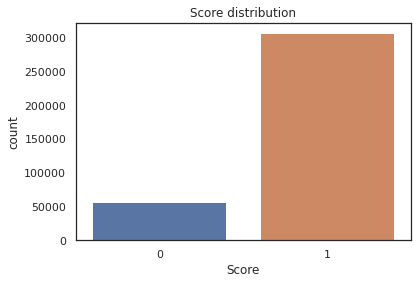

In [ ]:
#data points for each class
print(data['Score'].value_counts())
print("*"*50)

#Count plot for Score
sns.countplot('Score',data = data)
plt.title("Score distribution")

#Text Preprocessing: Stemming, stop-word removal and Lemmatization.

In [ ]:
#set of stopwords


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


In [ ]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

In [ ]:
#split data into train, cross validate and test 
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

#Training Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha

#Testing Multinomial Naive Bayes Model

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import sklearn.metrics as skplt
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    #prediction=prediction.reshape(-1, 1)
    #prediction=prediction.values()
    print(prediction.shape)
    print(X_test.shape)
    print(prediction,Y_test)
    skplt.plot_confusion_matrix(Y_test, prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################

In [ ]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

In [ ]:
def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)
    print(pred)
    return "positive review" if pred[0] == 1 else "negative review"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (364171, 3474709)
the number of unique words including both unigrams and bigrams  3474709


In [ ]:
print(X)

In [ ]:
BOW.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [ ]:
BOW.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
#split data into train, cross validate and test 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def Split_data(x_vec, y_vec):
    x_train, X_test, y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    #using SMOTE to balance the dataset
   
    sm = SMOTE(random_state=12)
    X_train, Y_train = sm.fit_resample(x_train,y_train)
    
    X_tr1, X_cv, Y_tr1, Y_cv = train_test_split(x_train, y_train, test_size=.33, random_state=0)
    sm = SMOTE(random_state=12)
    X_tr, Y_tr = sm.fit_resample(X_tr1,Y_tr1)
    
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train

In [ ]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [ ]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120177, 3474709) (120177,)
X_tr, Y_tr (275382, 3474709) (275382,)
X_cv, Y_cv (80519, 3474709) (80519,)
X_Train, Y_Train (411436, 3474709) (411436,)


In [ ]:
# Normalization

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275382, 3474709)
CV Data Size:  (80519, 3474709)
Test Data Size:  (120177, 3474709)


10000  ------>  0.7647719618833797
5000  ------>  0.7703488275626336
1000  ------>  0.7796652226778482
500  ------>  0.7822753021427739
100  ------>  0.790192748805014
50  ------>  0.7952983481097974
10  ------>  0.8112495626642302
5  ------>  0.8207261155525912
1  ------>  0.8573895083877834
0.5  ------>  0.8821612056891709
0.1  ------>  0.9295335134703182
0.05  ------>  0.934062190117285
0.01  ------>  0.930112236565993
0.005  ------>  0.925901483118805
0.001  ------>  0.9118236017972579
0.0005  ------>  0.90469773352551
0.0001  ------>  0.8878329332619201
5e-05  ------>  0.880845506893886
1e-05  ------>  0.865859999547843
****************************************************************************************************

 Best alpha Value 0.05 with highest roc_auc Score is 0.934062190117285
****************************************************************************************************


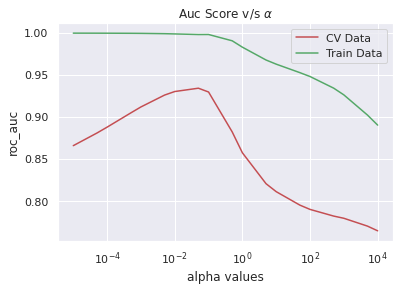

****************************************************************************************************


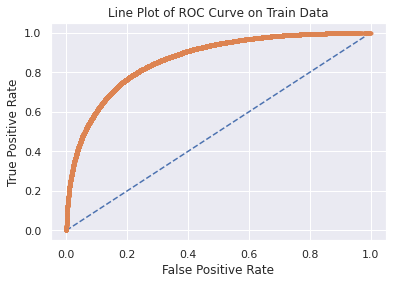

****************************************************************************************************


In [ ]:
#training NB 

best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.9348599909355195
**********************************************************************


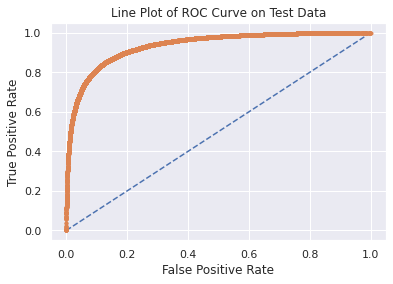

(120177,)
(120177, 3474709)
[1 0 1 ... 0 0 1] 68546     1
317740    0
317345    1
75803     0
203674    1
         ..
308817    1
35416     1
247072    0
303824    0
253024    1
Name: Score, Length: 120177, dtype: int64
macro f1 score for data : 0.8216140864458907
micro f1 score for data: 0.9044991970177321
hamming loss for data: 0.09550080298226782
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70     18834
           1       0.95      0.94      0.94    101343

    accuracy                           0.90    120177
   macro avg       0.82      0.83      0.82    120177
weighted avg       0.91      0.90      0.91    120177

**********************************************************************


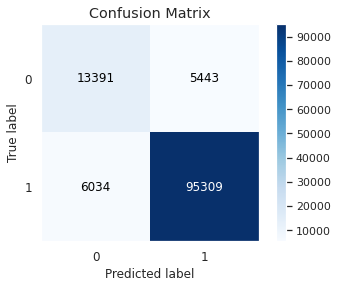

In [ ]:
 # Testing NB Model

NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [ ]:
# Top features using NB and BOW

Important_features(BOW, NB_bow)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-5.194557,like,-3.807952
1,great,-5.274154,would,-4.506791
2,good,-5.386931,taste,-4.734535
3,love,-5.495140,coffee,-4.868997
4,one,-5.646232,product,-4.896066
...,...,...,...,...
3474704,home jalapeno,-16.904796,phony chemically,-16.107885
3474705,home jam,-16.904796,phony cappuccinos,-16.107885
3474706,together actually,-16.904796,phony butter,-16.107885
3474707,home jammies,-16.904796,phony baloney,-16.107885


#TF-IDF

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (364171, 3474709)
the number of unique words including both unigrams and bigrams  3474709


In [ ]:

TfIdf.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [ ]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [ ]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120177, 3474709) (120177,)
X_tr, Y_tr (275382, 3474709) (275382,)
X_cv, Y_cv (80519, 3474709) (80519,)
X_Train, Y_Train (411436, 3474709) (411436,)


In [ ]:
# Normalize Data

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275382, 3474709)
CV Data Size:  (80519, 3474709)
Test Data Size:  (120177, 3474709)


#Naive bayes for TF-idf

10000  ------>  0.8857951459169217
5000  ------>  0.8895546766877014
1000  ------>  0.9044517089876178
500  ------>  0.9120721057616643
100  ------>  0.9278356087831826
50  ------>  0.933201663194128
10  ------>  0.9421571458312443
5  ------>  0.9445118608397947
1  ------>  0.9456370733097015
0.5  ------>  0.9433172926793806
0.1  ------>  0.9277770616036076
0.05  ------>  0.9171258383350557
0.01  ------>  0.8891734180850505
0.005  ------>  0.8775429602006598
0.001  ------>  0.8540340488263967
0.0005  ------>  0.845510348843849
0.0001  ------>  0.8289638942357187
5e-05  ------>  0.8230049303378586
1e-05  ------>  0.8113148367738807
****************************************************************************************************

 Best alpha Value 1 with highest roc_auc Score is 0.9456370733097015
****************************************************************************************************


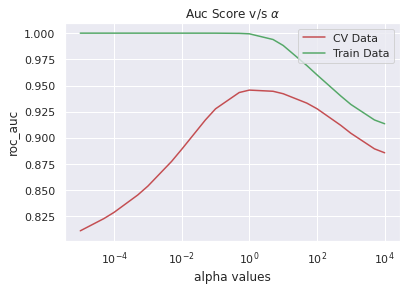

****************************************************************************************************


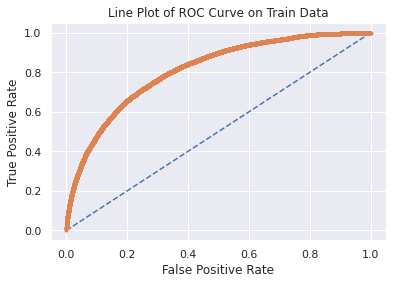

****************************************************************************************************


In [ ]:
#Training NB model

best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.9456454784632741
**********************************************************************


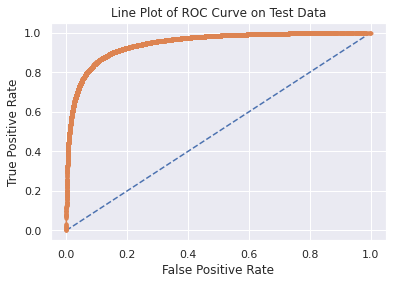

(120177,)
(120177, 3474709)
[1 0 1 ... 0 0 1] 68546     1
317740    0
317345    1
75803     0
203674    1
         ..
308817    1
35416     1
247072    0
303824    0
253024    1
Name: Score, Length: 120177, dtype: int64
macro f1 score for data : 0.8061305544987099
micro f1 score for data: 0.8765653993692637
hamming loss for data: 0.12343460063073633
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.57      0.87      0.69     18834
           1       0.97      0.88      0.92    101343

    accuracy                           0.88    120177
   macro avg       0.77      0.88      0.81    120177
weighted avg       0.91      0.88      0.89    120177

**********************************************************************


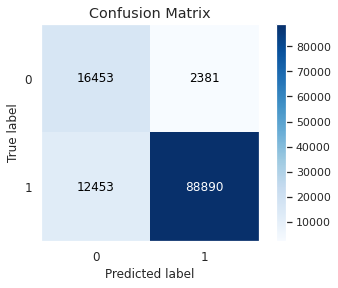

In [ ]:

# Testing NB Model

NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [ ]:
# Top features using NB and tfidf

Important_features(TfIdf, NB_tfidf)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-7.789871,like,-7.466521
1,like,-7.838476,taste,-7.731804
2,good,-7.916342,would,-7.788007
3,love,-7.956349,product,-7.793610
4,coffee,-8.147418,coffee,-8.030978
...,...,...,...,...
3474704,prejudge coffee,-15.287730,phony chemically,-15.310723
3474705,going pouring,-15.287730,phony cappuccinos,-15.310723
3474706,going powdered,-15.287730,phony butter,-15.310723
3474707,going practices,-15.287730,phony baloney,-15.310723


In [ ]:
#Conclusion

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.05        | 0.9348599909355195 |
|   Tf-Idf   | MultinomialNB |         1          | 0.9456454784632741 |
+------------+---------------+--------------------+--------------------+


#Individual prediction

In [ ]:
# Individual prediction
review = """ The food was really bad """

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

[0]
Prediction using BOW: negative review
[0]
Prediction using TF-Idf: negative review
